In [4]:
% matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


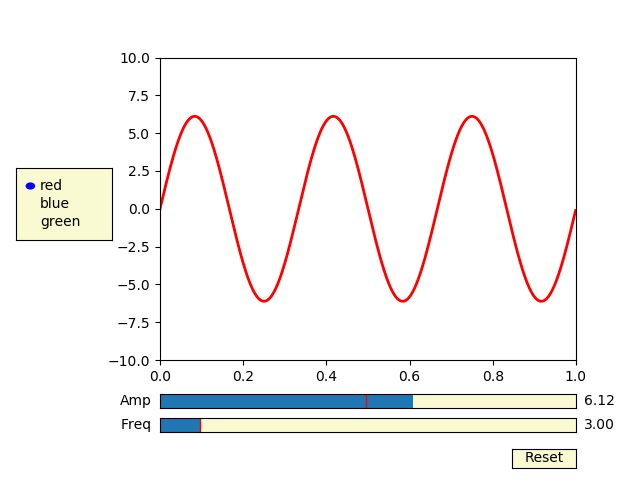

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

<IPython.core.display.Javascript object>


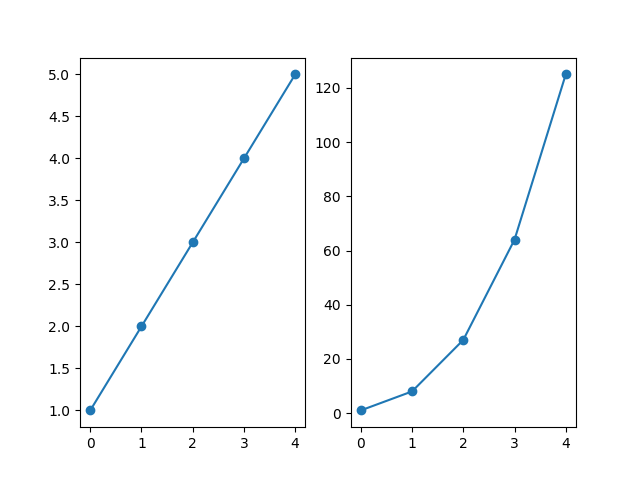

In [5]:
plt.figure()
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5])
plt.plot(linear_data,'-o')

plt.subplot(1,2,2)
cube_data = linear_data **3
plt.plot(cube_data,'-o')

##### MISLEADING AXIS

<IPython.core.display.Javascript object>


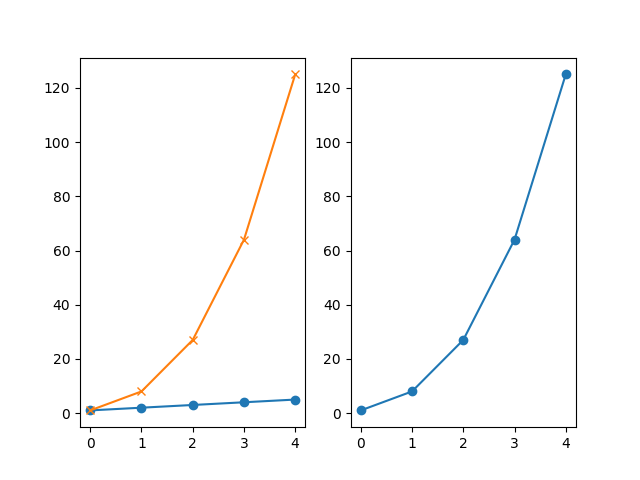

In [6]:
# Overlaying the data on the same figure

plt.figure()
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5])
plt.plot(linear_data,'-o')
plt.subplot(1,2,2)
exp_data = linear_data**3
plt.plot(exp_data,'-o')

plt.subplot(1,2,1)
plt.plot(exp_data,'-x')

##### FREEZING THE AXIS AND SHARING THE Y AXIS

<IPython.core.display.Javascript object>


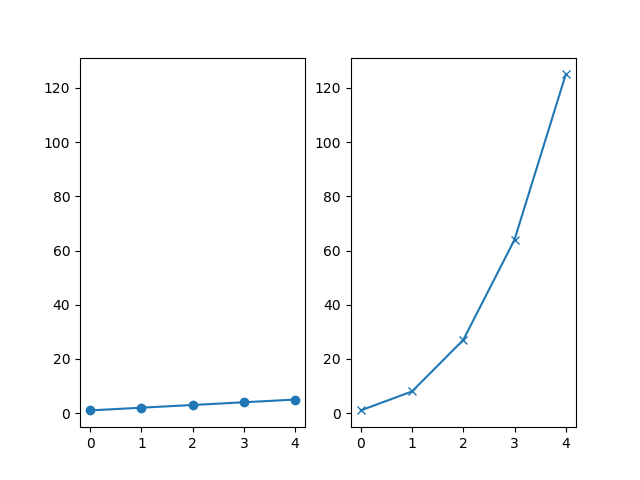

In [7]:
plt.figure()
ax1 = plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5])
plt.plot(linear_data,'-o')
plt.subplot(1,2,2,sharey=ax1)
exp_data = linear_data**3
plt.plot(exp_data,'-x')



<IPython.core.display.Javascript object>


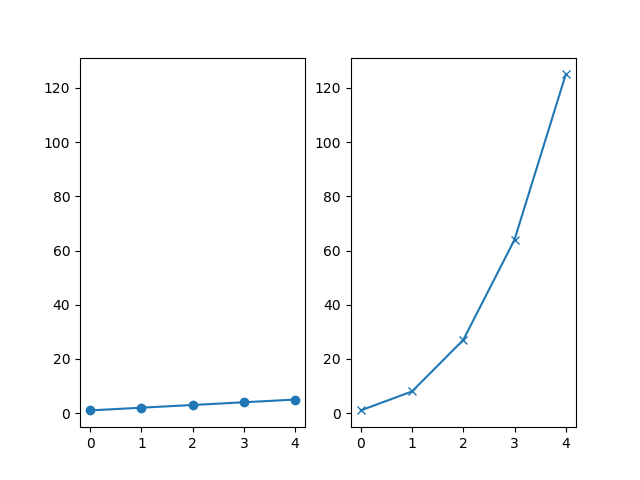

In [8]:
plt.gcf()

#### SIMILAR  to Facet Grid

<IPython.core.display.Javascript object>


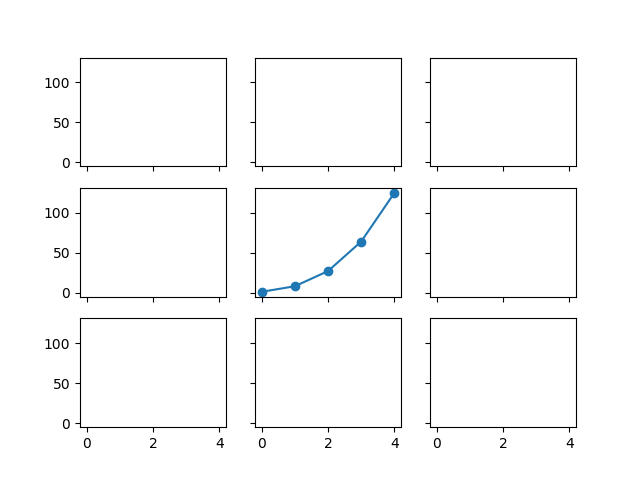

In [10]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True,sharey = True)
ax5.plot(cube_data,'-o')

##### HISTOGRAM

<IPython.core.display.Javascript object>


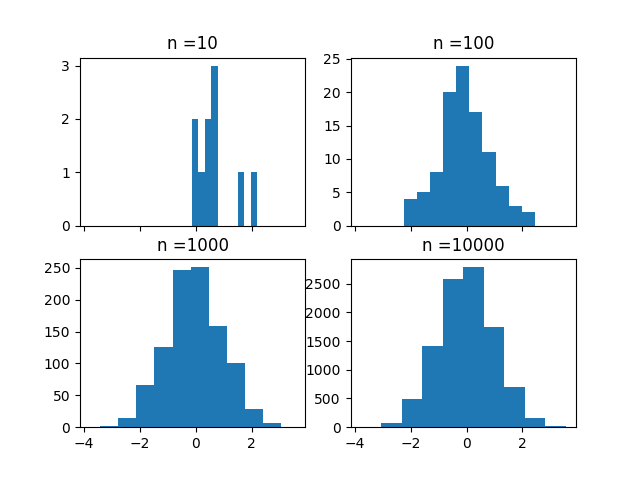

In [11]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = True)
ax = [ax1,ax2,ax3,ax4]
for i in range(0,len(ax)):
    sample_size = 10 **(i+1)
    sample = np.random.normal(size = sample_size)
    ax[i].hist(sample)
    ax[i].set_title("n ={}".format(sample_size))

<IPython.core.display.Javascript object>


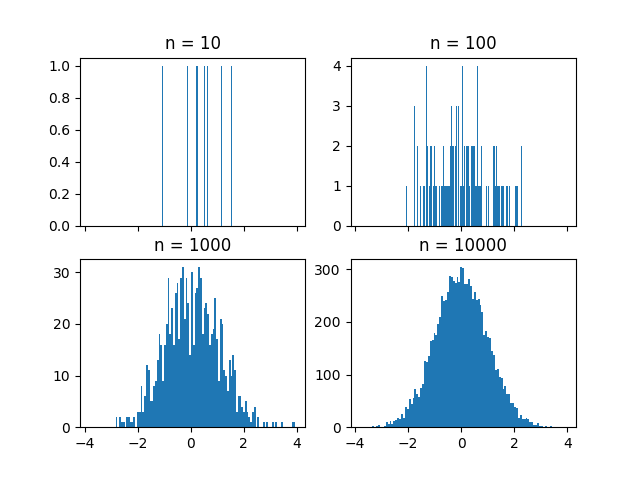

In [12]:
#changing the bin size

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True)
ax = [ax1,ax2,ax3,ax4]
for i in range(0,len(ax)):
    sample_size = 10 **(i+1)
    sample  = np.random.normal(size = sample_size)
    ax[i].hist(sample,bins= 100)
    ax[i].set_title("n = {}".format(sample_size))

<IPython.core.display.Javascript object>


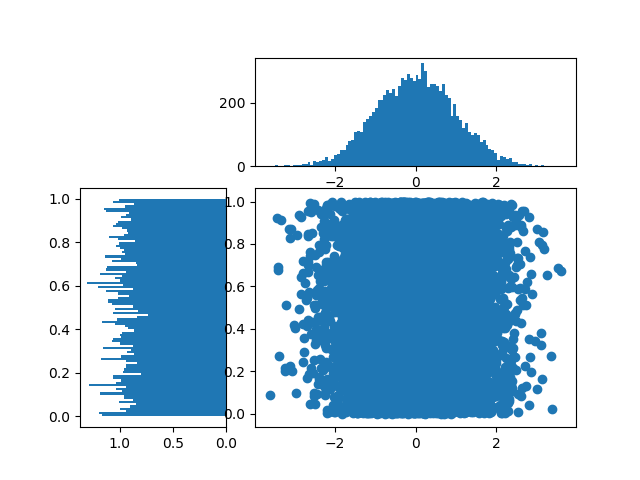

In [17]:
import matplotlib.gridspec as gridspec
plt.figure()
grid = gridspec.GridSpec(3,3)
top_plot = plt.subplot(grid[0,1:])
left_bottom = plt.subplot(grid[1:,0])
right_centre_bottom = plt.subplot(grid[1:,1:])

#filling it with data
y = np.random.random(size =10000)
x = np.random.normal(size = 10000)
right_centre_bottom.scatter(x,y)
top_plot.hist(x,bins = 100)
left_bottom.hist(y,bins = 100,orientation = 'horizontal',normed = True)
left_bottom.invert_xaxis()

#### BOX PLOTS

In [14]:
import pandas as pd
normal = np.random.normal(size = 10000)
gamma = np.random.gamma(2,2,size = 10000)
random = np.random.random(size = 10000)
df = pd.DataFrame({"Normal": normal,"Gamma":gamma,"Random":random})

<IPython.core.display.Javascript object>


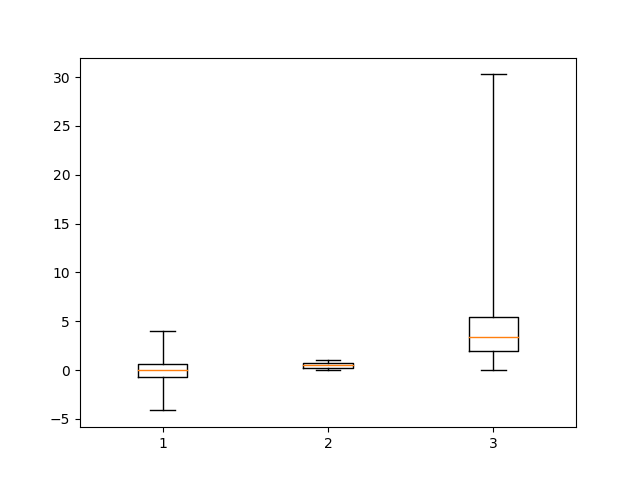

{'boxes': [<matplotlib.lines.Line2D at 0xb8bb6a0>],
 'caps': [<matplotlib.lines.Line2D at 0xb8c1a20>,
 'fliers': [<matplotlib.lines.Line2D at 0xb8d1940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb8c9a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb8bbf60>,
  <matplotlib.lines.Line2D at 0xb8c1860>]}

In [18]:
plt.figure()
plt.boxplot(df.Normal,whis = "range")

In [19]:
plt.clf()
plt.boxplot([df.Normal,df.Random,df.Gamma],whis = 'range')

{'boxes': [<matplotlib.lines.Line2D at 0xb7b4eb8>,
 'caps': [<matplotlib.lines.Line2D at 0xb7c28d0>,
 'fliers': [<matplotlib.lines.Line2D at 0xb7cab00>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb7ca2e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0xb7bc860>,
  <matplotlib.lines.Line2D at 0xbe70cc0>]}

<IPython.core.display.Javascript object>


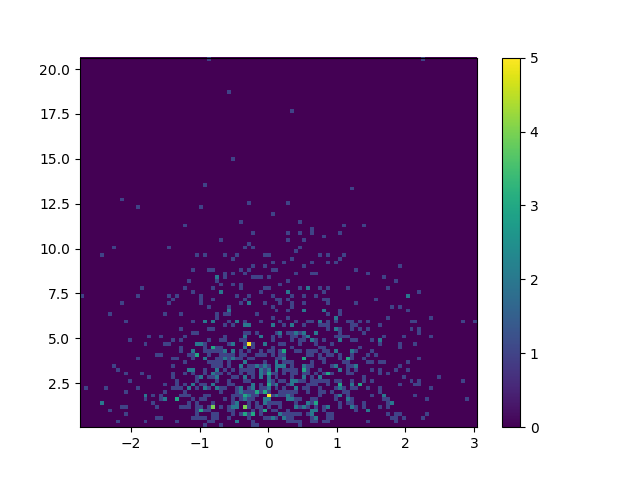

In [20]:
plt.figure()
x = np.random.normal(size = 1000)
y = np.random.gamma(2,2,size = 1000)
plt.hist2d(x,y,bins = 100)
plt.colorbar()

#### ANIMATION

<IPython.core.display.Javascript object>


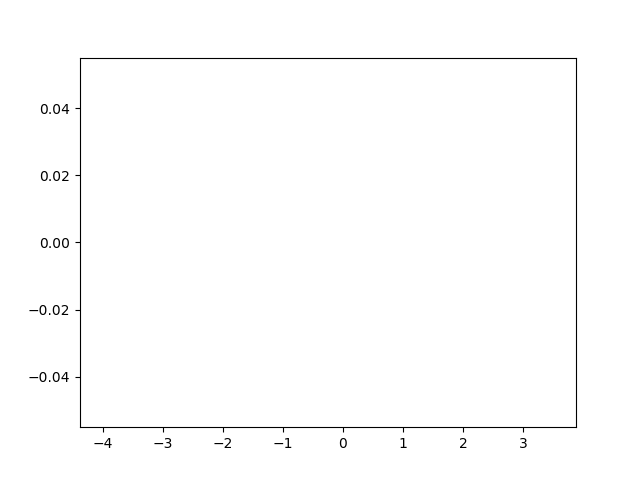

In [6]:
import matplotlib.animation as animation
import numpy as np
n = 100
x = np.random.randn(n)

def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4,4,0.5)
    plt.hist(x[:curr],bins = bins)
    plt.axis(-4,4,0,30)
    plt.annotate("n = {}",format(curr),[3,27])
        

fig = plt.figure()
a = animation.FuncAnimation(fig,update,interval =100,blit= True)
plt.show()

#### INTERACTIVITY

In [37]:
from random import shuffle
origin = ["India","Indonesia","China","Chile","UK","USA","Argentina","Brazil","Ethiopia","Uganda"]
shuffle(origin)
height = np.random.randint(50,100,size = 10)
weight = np.random.randint(10,80,size = 10)
df = pd.DataFrame({"origin":origin,
                  "Height":height,
                  "Weight":weight})

<IPython.core.display.Javascript object>


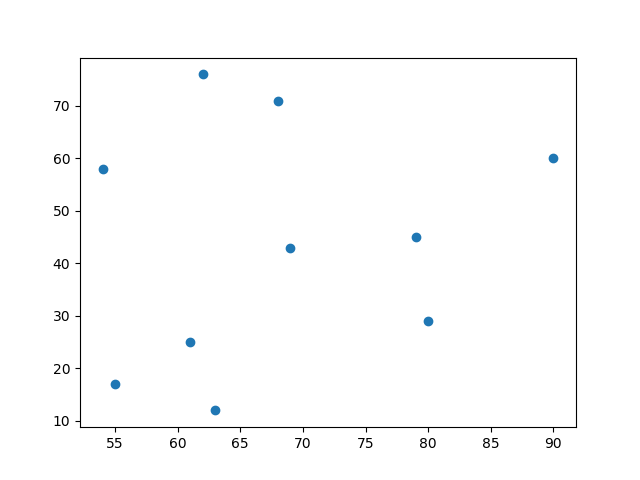

7

In [41]:
plt.figure()
plt.scatter(df.Height,df.Weight,picker = 5)

def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca.set_title("Item came from {}".format(origin))
plt.gcf().canvas.mpl_connect('pick_event',onpick)